Note: many sources were used for putting this Notebook together, often code and comments are included as-is from the original source. Sources are provided ahead of the content that was taken from them. Thank you to the creators of the many wonderful Geopandas resources already in existance!

# First we need to import our libraries

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point

import pandas as pd

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

# Let's start by making some simple graphs
Source: https://github.com/geohackweek/tutorial_contents

In [86]:
# Let's check the version of the libraries we're using. Do yours look the same as mine?
mpl.__version__, pd.__version__, gpd.__version__

('2.1.1', '0.22.0', '0.3.0')

In [2]:
#this is your library
mpl.__version__, pd.__version__, gpd.__version__

('2.2.2', '0.22.0', '0.3.0')

In [4]:
# Let's create some data
# Create a GeoSeries from a list of shapely Point objects using the Point constructor
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [5]:
# Check the type and length of our GeoSeries
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

In [6]:
# Coordinates are of no use unless you know their reference system. Set the projection/crs to WGS 84, aka EPSG 4326
gs.crs = {'init': 'epsg:4326'}

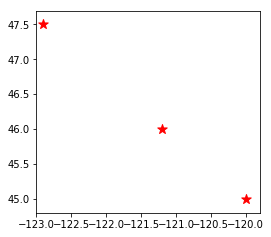

In [7]:
# We can plot our points with the plot function, with some customizations
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))

# We limit the bounds to our area, but this will happen by default
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [17]:
minx = min(gs.bounds['minx'])
miny = min(gs.bounds['miny'])
maxx = max(gs.bounds['maxx'])
maxy = max(gs.bounds['maxy'])

In [19]:
gs.bounds

,minx,miny,maxx,maxy
0,-120.0,45.0,-120.0,45.0
1,-121.2,46.0,-121.2,46.0
2,-122.9,47.5,-122.9,47.5


In [18]:
print(minx, miny, maxx, maxy)

-122.9 45.0 -120.0 47.5


In [20]:
# Let's define a simple dictionary of lists, that we’ll use again later.
data = {'name': ['House', 'Work', 'Pet Store'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [22]:
#if people aren't familiar with dictionaries, you could walk through a couple characteristics
# name is the key and it holds a list of strings ['House', 'Work', 'Pet Store']
#selecting by key
data['name']

['House', 'Work', 'Pet Store']

In [27]:
#list all keys
list(data.keys())

['name', 'lat', 'lon']

In [28]:
# explain zip

x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

[(1, 4), (2, 5), (3, 6)]

In [29]:
# Now we create a list of Point shapely objects out of the X & Y coordinate lists
# Very important - the geometry is what makes the data spatial
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

In [30]:
# We’ll wrap up by creating a GeoSeries where we explicitly define the index values
# If you change the index to lat or long the graph will look different
# The index is how it orients it in a row format
gs = GeoSeries(geometry, index=data['name'])
gs

House            POINT (-120 45)
Work           POINT (-121.2 46)
Pet Store    POINT (-122.9 47.5)
dtype: object

In [32]:
# Talk about difference between geoseries and geodataframe - above we used a GeoSeries, below we won't
df = pd.DataFrame(data)
df

,lat,lon,name
0,45.0,-120.0,House
1,46.0,-121.2,Work
2,47.5,-122.9,Pet Store


In [33]:
#it might be worth showing what df['lon'] or df['lat'] looks like
df['lon']

0   -120.0
1   -121.2
2   -122.9
Name: lon, dtype: float64

In [34]:
data['lon']

[-120, -121.2, -122.9]

In [35]:
# Now we use the DataFrame and the “list-of-shapely-Point-objects” approach to create a GeoDataFrame. 
# Note the use of two DataFrame attribute columns, which are effectively just two simple Pandas Series.
# Be sure to explain what zip does
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

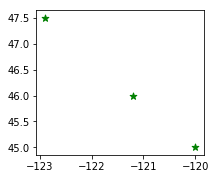

In [36]:
# There’s nothing new to visualize, but this time we’re using the plot method from a GeoDataFrame, not from a GeoSeries. 
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3));

# Using Geopandas Datasets
Source: http://geopandas.org/mapping.html

We have now made some point objects, but its more fun to work with real data. Geopandas comes with some datasets that we can use!

In [37]:
# Load some sample data:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [38]:
# Let's examine the top few rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


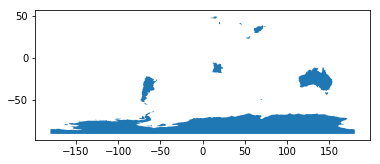

In [40]:
# Let's play with plotting the head and tail 
world.head(10).plot()
# world.tail()
# world.tail(5).plot()

In [45]:
# Exercise
world = world.set_index('pop_est')
# Set the index to a different column and see how that changes your head and tail tables and plot
world.head()

,continent,name,iso_a3,gdp_md_est,geometry
pop_est,,,,,
28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


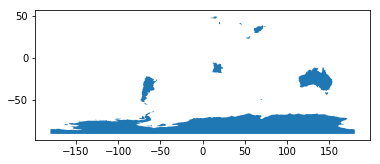

In [47]:
world.head(10).plot()

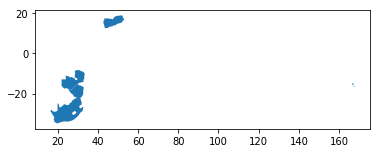

In [46]:

#
# world.tail()
world.tail(5).plot()

In [50]:
world = world.reset_index()

In [51]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [52]:
# cities is another geopandas dataset. It includes points for the capitals of each country.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [53]:
# Again we'll look at the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


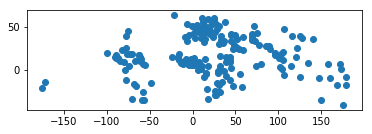

In [54]:
# Plot the cities using the default style
cities.plot()

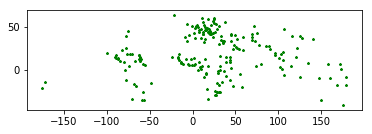

In [55]:
# Plot the cities using custom style
cities.plot(marker='*', color='green', markersize=5);

YOUR TURN #1: Play around with making the city dots different colors and sizes

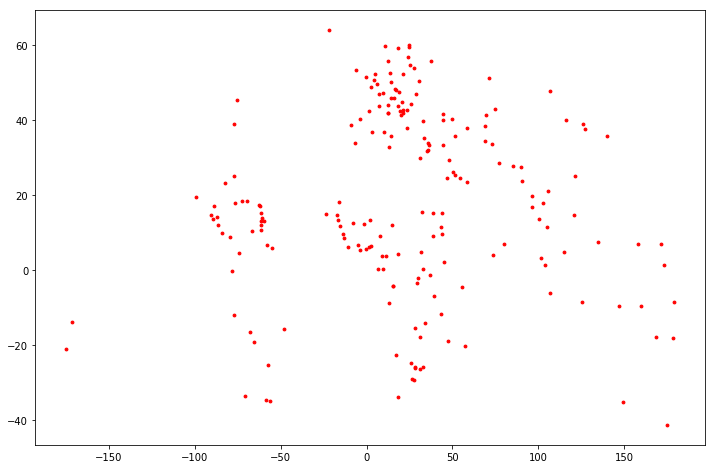

In [60]:
# Your code here
fig, ax = plt.subplots(figsize=(12,8))
cities.plot(ax=ax, marker='o', color='red', markersize=8);


In [61]:
# We can exclude Antarctica by name
world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.name!="Fr. S. Antarctic Lands")]

In [62]:
# The data came with a gdp_per_cap column, so we can use this data to make a choropleth map!
#below the period notation is the same as world['gdp_md_est'] / world['pop_est']
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [64]:
# Let's take a look at the new column
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


In [65]:
# What are the 5 countries with the highest GDP?
world.sort_values('gdp_per_cap', ascending = False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
133,833285.0,Asia,Qatar,QAT,91330.0,"POLYGON ((50.81010827006958 24.75474253997138,...",0.109602
97,491775.0,Europe,Luxembourg,LUX,39370.0,"POLYGON ((6.043073357781111 50.12805166279423,...",0.080057
118,4676305.0,Europe,Norway,NOR,276400.0,(POLYGON ((28.16554731620292 71.18547435168051...,0.059106
89,2691158.0,Asia,Kuwait,KWT,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4...",0.055404
23,388190.0,Asia,Brunei,BRN,20250.0,"POLYGON ((114.2040165548284 4.525873928236805,...",0.052165


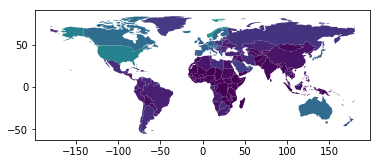

In [66]:
# And plot...
world.plot(column='gdp_per_cap');

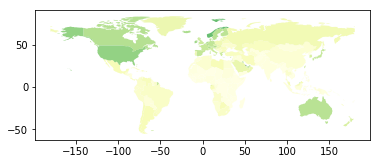

In [68]:
# We can change the style using the cmap (short for color map) property
world.plot(column='gdp_per_cap', cmap='YlGn');

# Try setting the cmap property to YlGn
# Look into other color options

See colormap options [here](https://matplotlib.org/users/colormaps.html).

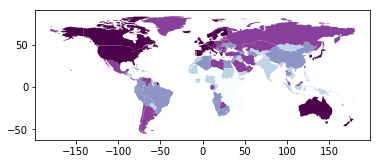

In [69]:
# You can change the default classification scheme
base = world.plot(column='gdp_per_cap', cmap='BuPu', scheme='quantiles');

YOUR TURN #2: The scheme option can be set to 'equal_interval', 'quantiles', or 'fisher_jenks'. 
Try out each one. See the difference?

More info on classification schemes [here](http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html).

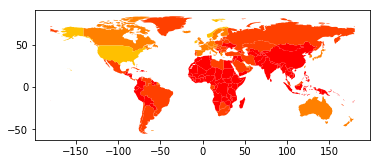

In [73]:
# Your code here

base = world.plot(column='gdp_per_cap', cmap='autumn', scheme='fisher_jenks');


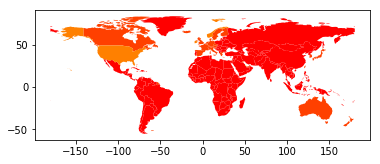

In [76]:
base = world.plot(column='gdp_per_cap', cmap='autumn', scheme='equal_interval');

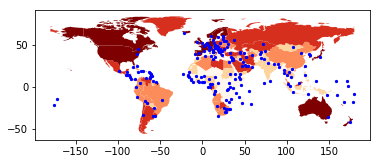

In [81]:
# We can plot the cities on top of our new chropleth map

# Create a variable to hold our choropleth map, call it base
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

# Now when you plot the cities, set an ax property to the variable you just created
cities.plot(ax=base, marker='o', color='blue', markersize=5);

# Now you will get them both on the same map

Geopandas is geo-enabled [Pandas](https://pandas.pydata.org/), a Python data science library, so we have everything that comes with Pandas already!

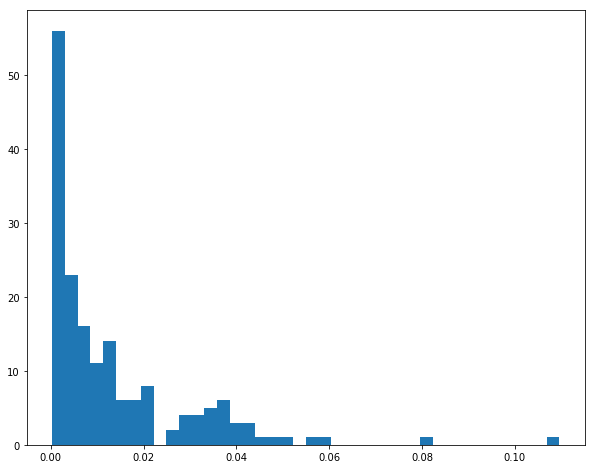

In [82]:
# Add stuff about pandas, make some charts based on GDP
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.hist(world['gdp_per_cap'], bins=40)
ax.set_title("")

<BarContainer object of 10 artists>

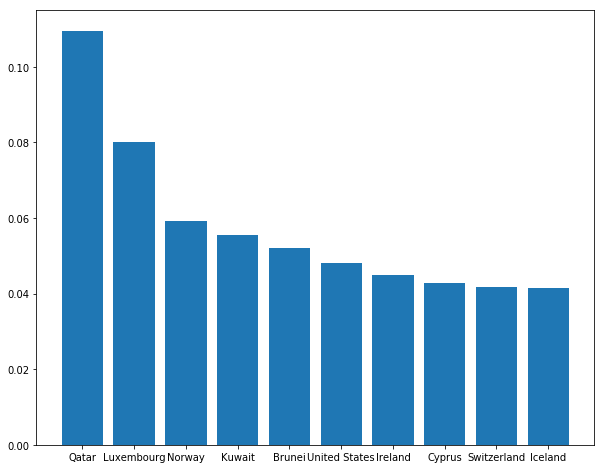

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
y = world.sort_values('gdp_per_cap', ascending = False)['gdp_per_cap'][:10]
x = world.sort_values('gdp_per_cap', ascending = False)['name'][:10]
ax.bar(x, y)

# Managing Projections

Source: http://geopandas.org/projections.html

We saw before how we can set a projection. We can also check a projection and re-project.

In [94]:
# Check original projection (it's Platte Carree!)
world.crs

{'init': 'epsg:4326'}

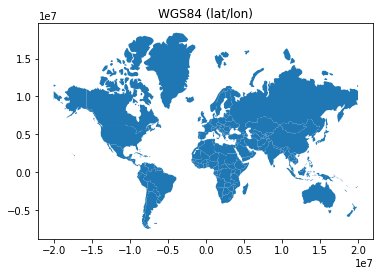

In [98]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

In [99]:
#Set the projection to be the same as another dataset
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(epsg=3395)

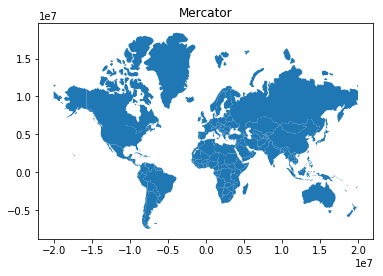

In [100]:
ax = world.plot()
ax.set_title("Mercator");

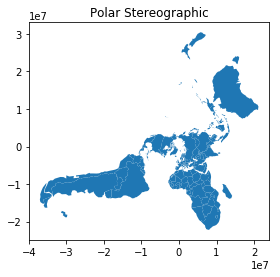

In [101]:
#Set the projection to be the same as another dataset
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(epsg=3995)
ax = world.plot()
ax.set_title("Polar Stereographic");

YOUR TURN #3: Make a basemap with the Mercator projection and add `cities` to it. Can you do this without reprojecting cities?

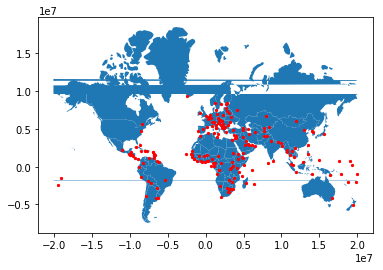

In [102]:
# Your code here
cities = cities.to_crs(epsg=3395)
world = world.to_crs(epsg=3395)
base = world.plot()
cities.plot(ax=base, marker='o', color='red', markersize=5);